# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [2]:
import numpy as np
import pandas as pd

### Task 1. Reading 

In [3]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
# datY=pd.DataFrame(datY, columns=datY.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [ ]:
!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

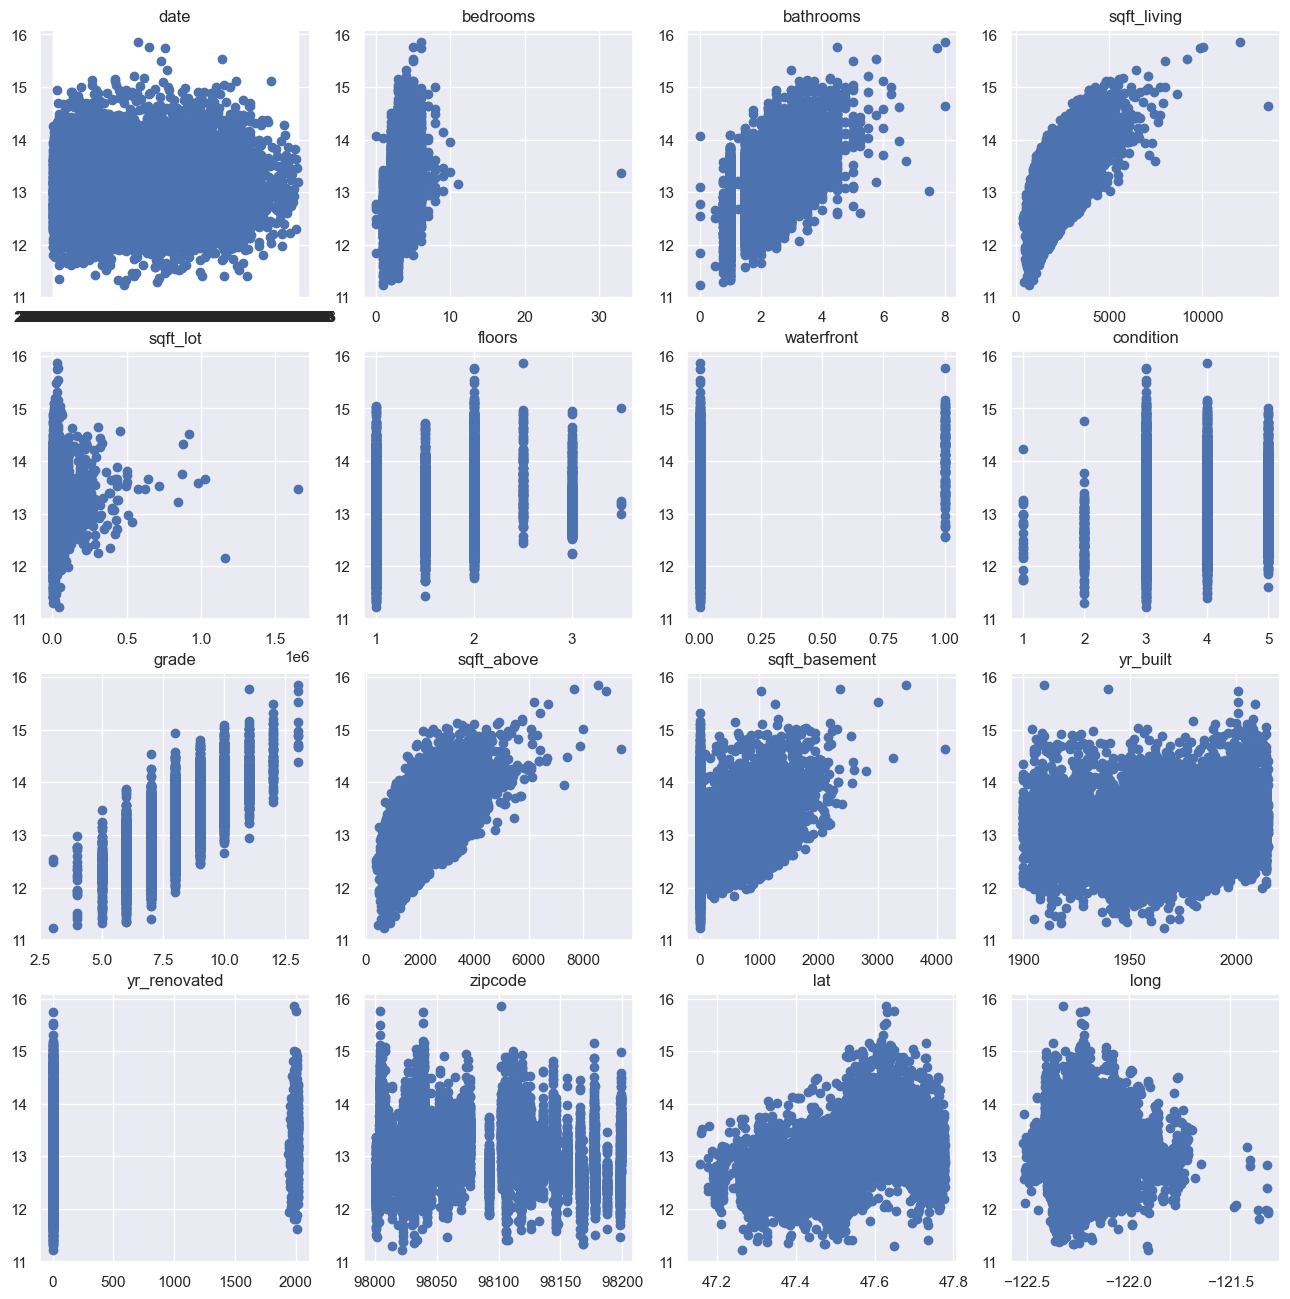

In [5]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features


**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [6]:
set_of_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long']
X=datX[set_of_features].values
N=X.shape[0]
m=X.shape[1]

print(X)

[[ 5.00000000e+00  3.25000000e+00  3.71000000e+03 ...  1.20000000e+03
   4.76100998e+01 -1.22046997e+02]
 [ 3.00000000e+00  1.75000000e+00  2.82000000e+03 ...  1.28000000e+03
   4.75093994e+01 -1.22375999e+02]
 [ 3.00000000e+00  1.00000000e+00  1.24000000e+03 ...  0.00000000e+00
   4.74303017e+01 -1.22045998e+02]
 ...
 [ 2.00000000e+00  1.00000000e+00  6.40000000e+02 ...  0.00000000e+00
   4.75149994e+01 -1.22359001e+02]
 [ 3.00000000e+00  1.00000000e+00  1.63000000e+03 ...  0.00000000e+00
   4.77547989e+01 -1.22317001e+02]
 [ 2.00000000e+00  1.00000000e+00  7.20000000e+02 ...  0.00000000e+00
   4.76534004e+01 -1.22403999e+02]]


Run the following cells to automatically check results of your code:

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [7]:
X = np.concatenate((np.ones((N, 1)), X), axis=1)
m = X.shape[1]
y = datY


In [126]:
w = np.random.rand(m)

In [127]:
def loss(w, X, y):
    #your code goes here
    y_predicted = np.dot(X, w)
    lossValue = (1/N)*np.sum((y-y_predicted)**2)
    return lossValue

print(w)
loss(w, X, y)

[0.03076362 0.8412625  0.19870755 0.03258042 0.97399076 0.74260497
 0.44618332 0.05731077 0.02571784 0.70247329 0.60788699]


24509.36576440586

Run the following cells to automatically check results of your code.

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$\nabla Loss$ = (-2/N)*np.sum(np.dot(X.T, (y-np.dot(X, w_k))))

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [292]:
def grad(w_k, X, y):
    #your code goes here
    lossGradient = (-2/N)*np.sum(np.dot(X.T, (y-np.dot(X, w_k))))
    return lossGradient

w_k = w
grad(w, X, y)

1402442.2561461383

Run the following cells to automatically check your function. 

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [273]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    
    curiter = 0
    w_k=weights[-1]
    
    #your code goes here
    while curiter <= maxiter:
        lossGradient=grad(w_k, X, y)
        w_k=w_k-alpha*lossGradient
        lossValue_k=loss(w_k, X, y)
        weights.append(w_k)
        losses.append(lossValue_k)
        if lossGradient <= eps: break
        curiter += 1
        
    return weights, losses


Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

w_init_001 = [0.03076362 0.8412625  0.19870755 0.03258042 0.97399076 0.74260497
 0.44618332 0.05731077 0.02571784 0.70247329 0.60788699]
w_init_002 = [ 1.00650459  0.18854126  0.90454039  0.23458038 -0.77779627  1.30220483
 -2.06211725  0.06555727 -0.3978658   0.21498052 -0.06001325]


<Figure size 800x800 with 0 Axes>

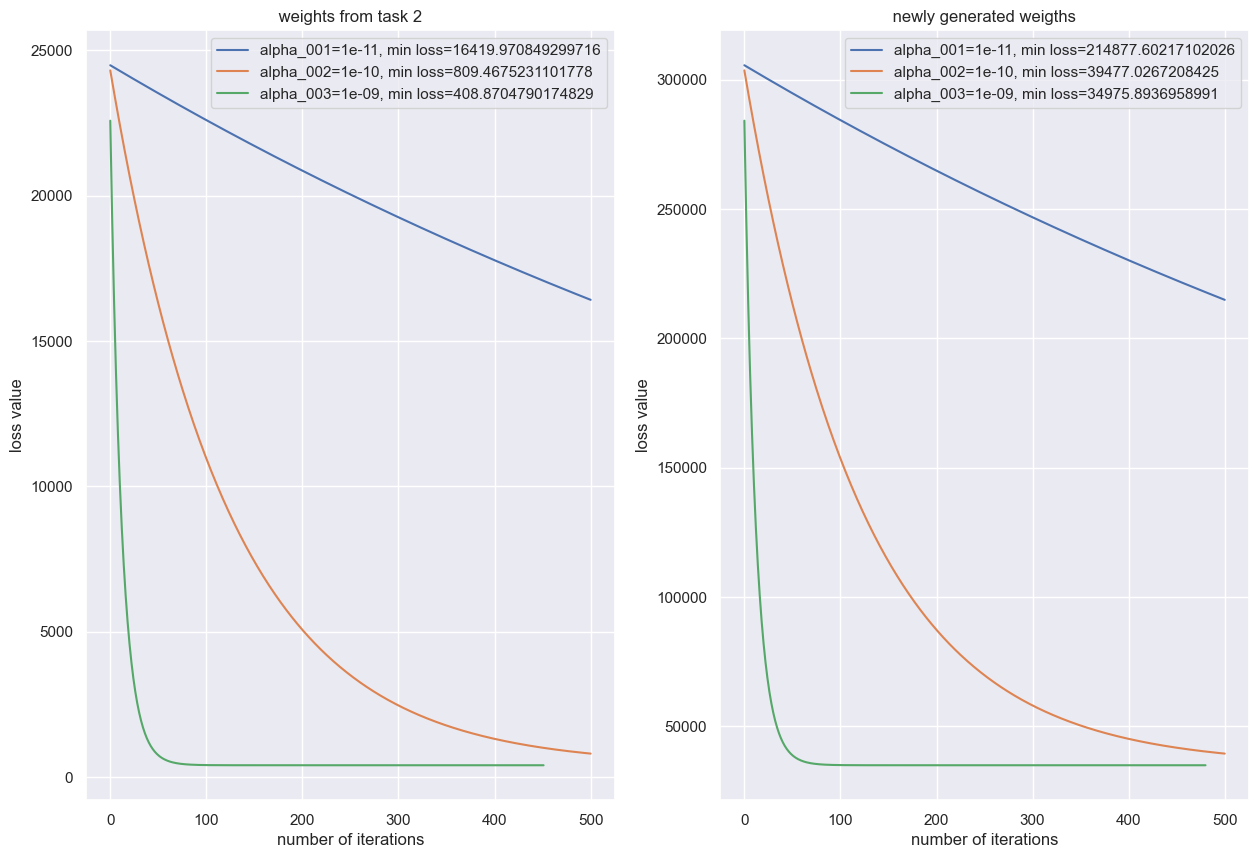

In [359]:
plt.figure(figsize=(8,8))

#your code goes here
alpha_001, alpha_002, alpha_003 = 1e-11, 1e-10, 1e-9
w_init_001, w_init_002 = w, np.random.randn(m)

weights_001, losses_001 = gradDescent(w_init_001, alpha_001, X, y)
weights_002, losses_002 = gradDescent(w_init_001, alpha_002, X, y)
weights_003, losses_003 = gradDescent(w_init_001, alpha_003, X, y)
losses_004 = gradDescent(w_init_002, alpha_001, X, y)[1]
losses_005 = gradDescent(w_init_002, alpha_002, X, y)[1]
losses_006 = gradDescent(w_init_002, alpha_003, X, y)[1]


plt.subplots(1, 2, figsize=(15,10))
plt.subplot(1, 2, 1)    
plt.plot(losses_001, label=f'alpha_001={alpha_001}, min loss={losses_001[-1]}')
plt.plot(losses_002, label=f'alpha_002={alpha_002}, min loss={losses_002[-1]}')
plt.plot(losses_003, label=f'alpha_003={alpha_003}, min loss={losses_003[-1]}')
plt.title(' weights from task 2 ')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_004, label=f'alpha_001={alpha_001}, min loss={losses_004[-1]}')
plt.plot(losses_005, label=f'alpha_002={alpha_002}, min loss={losses_005[-1]}')
plt.plot(losses_006, label=f'alpha_003={alpha_003}, min loss={losses_006[-1]}')
plt.title(' newly generated weigths ')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

print(f'w_init_001 = {w_init_001}\nw_init_002 = {w_init_002}')

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [367]:
### your code goes here
take_dimensions = list(range(101, 116))
X_take = datX[set_of_features].take(take_dimensions).values
X_take = np.concatenate((np.ones((X_take.shape[0], 1)), X_take), axis=1)
y_take = datY.take(take_dimensions)

y_take_predicted_001 = np.dot(X_take, weights_001[-1])
y_take_predicted_002 = np.dot(X_take, weights_002[-1])
y_take_predicted_003 = np.dot(X_take, weights_003[-1])

print(y_take_predicted_001, y_take_predicted_002, y_take_predicted_003, '-'*72, y_take, sep='\n')

[ 64.03462404 165.80065188  64.23309164 148.49148604 275.89882285
  38.69047004 125.68293582 109.51557025 129.66846177  83.12050224
  85.82270774 137.87409502 107.19309181  68.22350069 241.62540859]
[ 1.27475608 47.32746799  6.67055359 41.28166233 91.74108659 -2.39878273
 32.17230838 10.31148026 34.23332531 15.11019919 16.38313214 37.72343986
 24.11405662  8.74355407 77.77181057]
[-10.51770581  25.06657815  -4.14533973  21.13713682  57.13819212
 -10.11937653  14.60183624  -8.32878285  16.30124153   2.33119035
   3.33556566  18.90531893   8.50366117  -2.43261674  46.98402573]
------------------------------------------------------------------------
[13.05397746 12.61153775 12.89921983 13.17115354 13.90443677 12.85186613
 13.45740602 13.32937755 13.27936713 12.40901349 12.46843691 13.258641
 13.09190417 12.44901882 13.58860996]


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

**Comparison conclusions:**
<br>
<br>
Predicted values cannot be considered satisfactory.
<br>
<br>
With max number of iterations in gradDescent function at 500 and the smallest alpha (alpha_001 = 1e-11) our predicted values differ from actual answers around 2-3 to 20-200 times or even more depending on how lucky we were when randomly generating weights in the task 2. The reason is that, with a very small step, 500 iterations are not enough for the loss value to converge. If we change the maxiter parameter to 5000 then the loss value gets much closer to convergence but we still may need to increase the number of iterations. Althogh most likely this will result in two-digit house pirices prediction, this won't garantee sufficient prediction precision.
<br>
With alpha_002 at 1e-10 we almost reach convergence of loss value and get some house prices more-or-less simialr to actual, but this is still far from what we expect and needs improvement.
<br>
alpha_003 allows us to reach loss value convergence through less than 500 iterations however predictions obtained in this case are also not perfect, as some prices are 2-3 times bigger, or several times smaller, or even negative.
<br>

+++ The experiment with weights generated on the go shows very similar dependancy on alpha and max number of iterarations with the same precision of predictions.

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [254]:
def norm(X):
    # your code goes here
    X_avg = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)+0.000001
    X =(X-X_avg)/X_std

    return X

norm(X)

array([[ 0.        ,  1.73018373,  1.45360861, ...,  2.04323597,
         0.35657835,  1.17526481],
       [ 0.        , -0.39874912, -0.48281494, ...,  2.22330137,
        -0.36995026, -1.15391939],
       [ 0.        , -0.39874912, -1.45102671, ..., -0.65774518,
        -0.94062118,  1.18234046],
       ...,
       [ 0.        , -1.46321555, -1.45102671, ..., -0.65774518,
        -0.32954781, -1.03357937],
       [ 0.        , -0.39874912, -1.45102671, ..., -0.65774518,
         1.40054697, -0.73624016],
       [ 0.        , -1.46321555, -1.45102671, ..., -0.65774518,
         0.66898181, -1.35214553]])

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$ s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

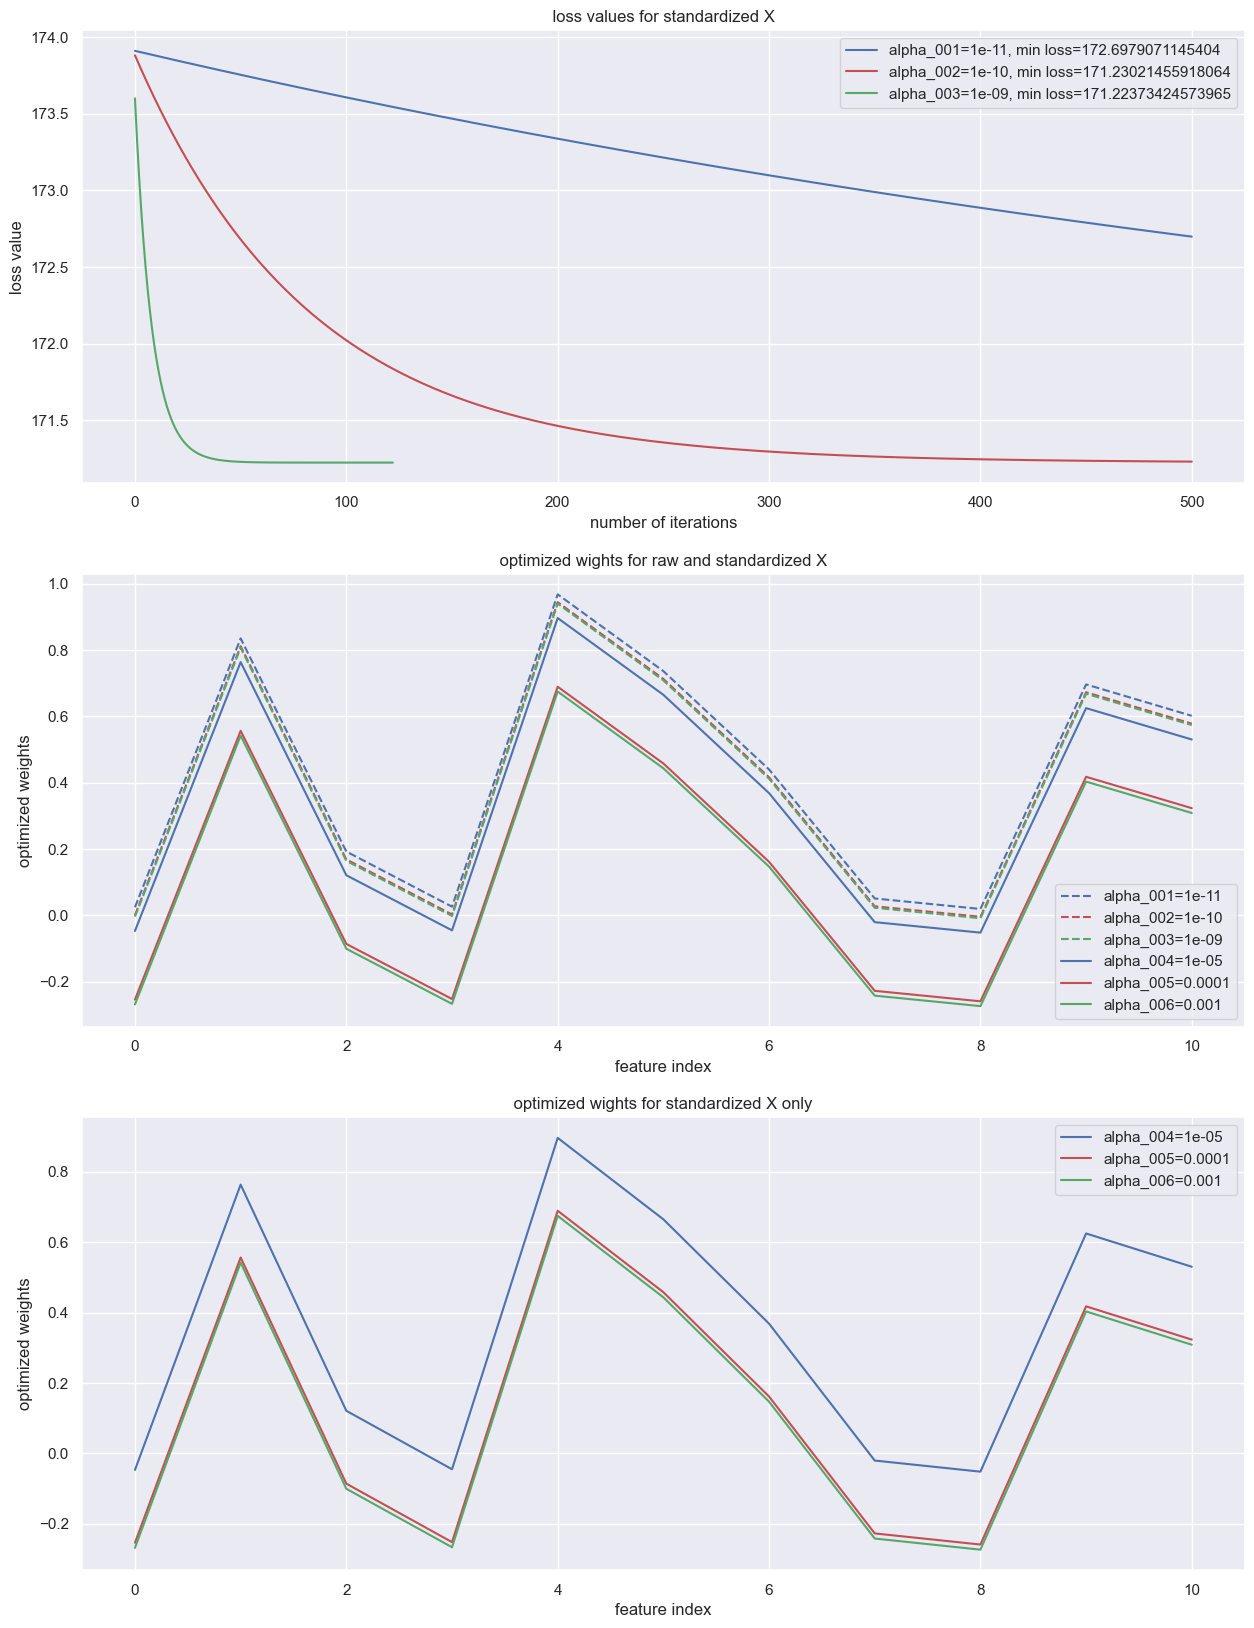

In [366]:
# your code goes here

alpha_004, alpha_005, alpha_006 = 1e-5, 1e-4, 1e-3
w_init_001 = w

weights_007, losses_007 = gradDescent(w_init_001, alpha_004, norm(X), y)
weights_008, losses_008 = gradDescent(w_init_001, alpha_005, norm(X), y)
weights_009, losses_009 = gradDescent(w_init_001, alpha_006, norm(X), y)

plt.subplots(3, 1, figsize=(15,20))
plt.subplot(3, 1, 1)    
plt.plot(losses_007, 'b', label=f'alpha_001={alpha_001}, min loss={losses_007[-1]}')
plt.plot(losses_008, 'r', label=f'alpha_002={alpha_002}, min loss={losses_008[-1]}')
plt.plot(losses_009, 'g', label=f'alpha_003={alpha_003}, min loss={losses_009[-1]}')
plt.title(' loss values for standardized X ')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(weights_001[-1], 'b--', label=f'alpha_001={alpha_001}')
plt.plot(weights_002[-1], 'r--', label=f'alpha_002={alpha_002}')
plt.plot(weights_003[-1], 'g--', label=f'alpha_003={alpha_003}')
plt.plot(weights_007[-1], 'b', label=f'alpha_004={alpha_004}')
plt.plot(weights_008[-1], 'r', label=f'alpha_005={alpha_005}')
plt.plot(weights_009[-1], 'g', label=f'alpha_006={alpha_006}')
plt.title(' optimized wights for raw and standardized X ')
plt.xlabel('feature index')
plt.ylabel('optimized weights')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(weights_007[-1], 'b', label=f'alpha_004={alpha_004}')
plt.plot(weights_008[-1], 'r', label=f'alpha_005={alpha_005}')
plt.plot(weights_009[-1], 'g', label=f'alpha_006={alpha_006}')
plt.title(' optimized wights for standardized X only ')
plt.xlabel('feature index')
plt.ylabel('optimized weights')
plt.legend()


### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [368]:
def new_loss(w, X, y, a, b):
    #your code goes here
    y_predicted = np.dot(X, w)
    lossValue=0
    for i in range(N):
        if y[i] > y_predicted[i]:
            lossValue += a*((y[i]-y_predicted[i])**2)
        else:
            lossValue += b*((y[i]-y_predicted[i])**2)
    lossValue = (1/N)*lossValue
  
    return lossValue

def new_grad(w_k, X, y, a, b):
    #your code goes here
    y_predicted = np.dot(X, w_k)
    loss_vector=[]
    for i in range(N):
        if y[i] > y_predicted[i]:
            loss_vector.append(a*(y[i]-y_predicted[i]))
        else:
            loss_vector.append(b*(y[i]-y_predicted[i]))
    
    lossGradient = (-2/N)*np.sum(np.dot(X.T, loss_vector))

    return lossGradient

print(new_loss(w, X, y, 1, 1))
print(new_grad(w, X, y, 1, 1))

24509.365764405797
1402442.2561461383


### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [369]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    
    curiter = 0
    w_k=weights[-1]
    
    #your code goes here
    while curiter <= maxiter:
        lossGradient=new_grad(w_k, X, y, a, b)
        w_k=w_k-alpha*lossGradient
        lossValue_k=new_loss(w_k, X, y, a, b)
        weights.append(w_k)
        losses.append(lossValue_k)
        if lossGradient <= eps: break
        curiter += 1
        
    return weights, losses

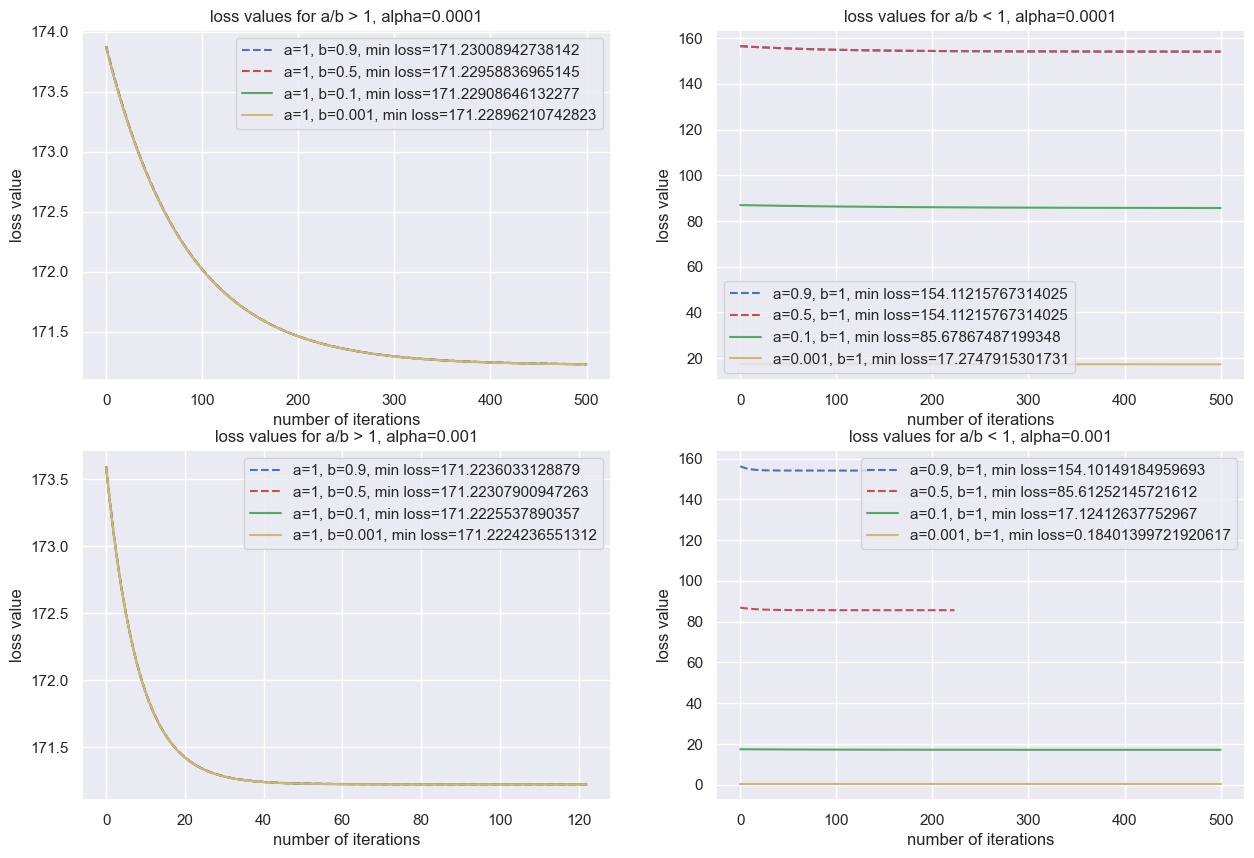

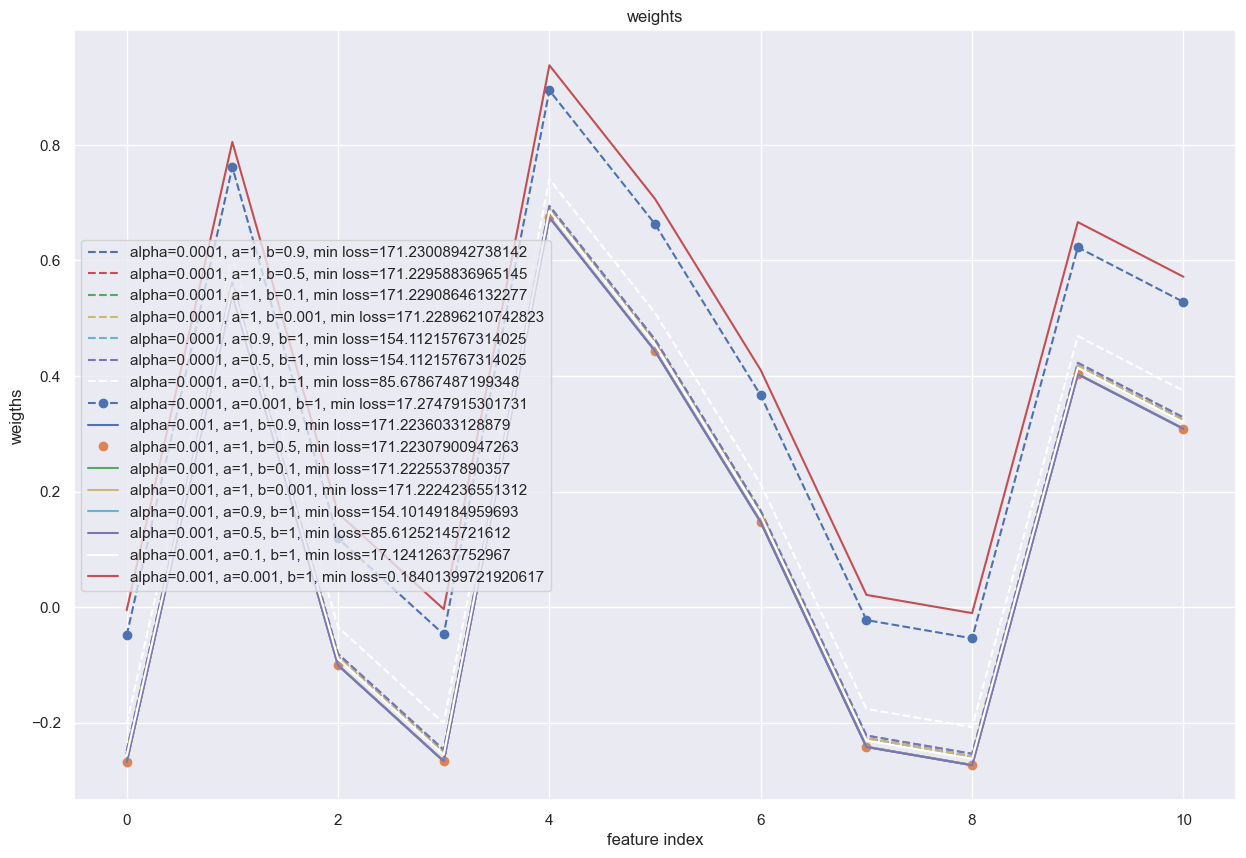

In [374]:
# your code goes here

a_001, b_001 = 1, 0.9
a_002, b_002 = 1, 0.5
a_003, b_003 = 1, 0.1
a_004, b_004 = 1, 0.001
a_005, b_005 = 0.9, 1
a_006, b_006 = 0.5, 1
a_007, b_007 = 0.1, 1
a_008, b_008 = 0.001, 1

weights_010, losses_010 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_001, b_001)
weights_011, losses_011 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_002, b_002)
weights_012, losses_012 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_003, b_003)
weights_013, losses_013 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_004, b_004)
weights_014, losses_014 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_005, b_005)
weights_015, losses_015 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_005, b_006)
weights_016, losses_016 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_006, b_007)
weights_017, losses_017 = new_gradDescent(w_init_001, alpha_005, norm(X), y, a_007, b_008)
weights_018, losses_018 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_001, b_001)
weights_019, losses_019 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_002, b_002)
weights_020, losses_020 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_003, b_003)
weights_021, losses_021 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_004, b_004)
weights_022, losses_022 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_005, b_005)
weights_023, losses_023 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_006, b_006)
weights_024, losses_024 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_007, b_007)
weights_025, losses_025 = new_gradDescent(w_init_001, alpha_006, norm(X), y, a_008, b_008)

plt.subplots(2, 2, figsize=(15,10))
plt.subplot(2, 2, 1)    
plt.plot(losses_010, 'b--', label=f'a={a_001}, b={b_001}, min loss={losses_010[-1]}')
plt.plot(losses_011, 'r--', label=f'a={a_002}, b={b_002}, min loss={losses_011[-1]}')
plt.plot(losses_012, 'g', label=f'a={a_003}, b={b_003}, min loss={losses_012[-1]}')
plt.plot(losses_013, 'y', label=f'a={a_004}, b={b_004}, min loss={losses_013[-1]}')
plt.title(f'loss values for a/b > 1, alpha={alpha_005}')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

plt.subplot(2, 2, 2)    
plt.plot(losses_014, 'b--', label=f'a={a_005}, b={b_005}, min loss={losses_014[-1]}')
plt.plot(losses_015, 'r--', label=f'a={a_006}, b={b_006}, min loss={losses_015[-1]}')
plt.plot(losses_016, 'g', label=f'a={a_007}, b={b_007}, min loss={losses_016[-1]}')
plt.plot(losses_017, 'y', label=f'a={a_008}, b={b_008}, min loss={losses_017[-1]}')
plt.title(f'loss values for a/b < 1, alpha={alpha_005}')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

plt.subplot(2, 2, 3)    
plt.plot(losses_018, 'b--', label=f'a={a_001}, b={b_001}, min loss={losses_018[-1]}')
plt.plot(losses_019, 'r--', label=f'a={a_002}, b={b_002}, min loss={losses_019[-1]}')
plt.plot(losses_020, 'g', label=f'a={a_003}, b={b_003}, min loss={losses_020[-1]}')
plt.plot(losses_021, 'y', label=f'a={a_004}, b={b_004}, min loss={losses_021[-1]}')
plt.title(f'loss values for a/b > 1, alpha={alpha_006}')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()

plt.subplot(2, 2, 4)    
plt.plot(losses_022, 'b--', label=f'a={a_005}, b={b_005}, min loss={losses_022[-1]}')
plt.plot(losses_023, 'r--', label=f'a={a_006}, b={b_006}, min loss={losses_023[-1]}')
plt.plot(losses_024, 'g', label=f'a={a_007}, b={b_007}, min loss={losses_024[-1]}')
plt.plot(losses_025, 'y', label=f'a={a_008}, b={b_008}, min loss={losses_025[-1]}')
plt.title(f'loss values for a/b < 1, alpha={alpha_006}')
plt.xlabel('number of iterations')
plt.ylabel('loss value')
plt.legend()


plt.subplots(1, 1, figsize=(15,10))
plt.subplot(1, 1, 1)    
plt.plot(weights_010[-1], 'b--', label=f'alpha={alpha_005}, a={a_001}, b={b_001}, min loss={losses_010[-1]}')
plt.plot(weights_011[-1], 'r--', label=f'alpha={alpha_005}, a={a_002}, b={b_002}, min loss={losses_011[-1]}')
plt.plot(weights_012[-1], 'g--', label=f'alpha={alpha_005}, a={a_003}, b={b_003}, min loss={losses_012[-1]}')
plt.plot(weights_013[-1], 'y--', label=f'alpha={alpha_005}, a={a_004}, b={b_004}, min loss={losses_013[-1]}')
plt.plot(weights_014[-1], 'c--', label=f'alpha={alpha_005}, a={a_005}, b={b_005}, min loss={losses_014[-1]}')
plt.plot(weights_015[-1], 'm--', label=f'alpha={alpha_005}, a={a_006}, b={b_006}, min loss={losses_015[-1]}')
plt.plot(weights_016[-1], 'w--', label=f'alpha={alpha_005}, a={a_007}, b={b_007}, min loss={losses_016[-1]}')
plt.plot(weights_017[-1], 'o--', label=f'alpha={alpha_005}, a={a_008}, b={b_008}, min loss={losses_017[-1]}')
plt.plot(weights_018[-1], 'b', label=f'alpha={alpha_006}, a={a_001}, b={b_001}, min loss={losses_018[-1]}')
plt.plot(weights_019[-1], 'o', label=f'alpha={alpha_006}, a={a_002}, b={b_002}, min loss={losses_019[-1]}')
plt.plot(weights_020[-1], 'g', label=f'alpha={alpha_006}, a={a_003}, b={b_003}, min loss={losses_020[-1]}')
plt.plot(weights_021[-1], 'y', label=f'alpha={alpha_006}, a={a_004}, b={b_004}, min loss={losses_021[-1]}')
plt.plot(weights_022[-1], 'c', label=f'alpha={alpha_006}, a={a_005}, b={b_005}, min loss={losses_022[-1]}')
plt.plot(weights_023[-1], 'm', label=f'alpha={alpha_006}, a={a_006}, b={b_006}, min loss={losses_023[-1]}')
plt.plot(weights_024[-1], 'w', label=f'alpha={alpha_006}, a={a_007}, b={b_007}, min loss={losses_024[-1]}')
plt.plot(weights_025[-1], 'r', label=f'alpha={alpha_006}, a={a_008}, b={b_008}, min loss={losses_025[-1]}')

plt.title(f'weights')
plt.xlabel('feature index')
plt.ylabel('weigths')
plt.legend()


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. Alpha increase helps to get proper weights for reaching loss value convergence within 500 iterations. (a, b) parameters of assymetry allow to reach the smallest loss values by decreasing impact of most loos-produsing values. In our case these are predicted prices lower than actual ones, because we have a lot of very small and negative prices.

2. The experiments have shown that it may be so that only change of one parameter affects the loss value. If (a) is fixed at 1 then in our case no change of (b) improves the loss value. If it happens so that (b) makes a bettr impact than we should try to minimize it in order to explore its influence and chose what's most appropriate for us.
